## Trabalho extra -  Unidade 1 

- **Aluno :**: Gabriel Queiroz de Almeida Pereira
- **Matrícula: **: 20150128108
- **Professor: **: Ivanovitch


## 1.1 Introdução

Esse documento tem como base de dados 2025 sorteios da Mega Sena e demonstra os mais diversos detalhes a cerca dos sorteios, como por exemplo: nº de ganhadores, prêmios acumulados, as 6 dezenas sorteiadas daquela edição, etc. E, ao decorrer dele, faremos uma análise sobre diversos dados contido nele.


A base de dados está em formato de planilha em excel. Para carregar esse arquivo em formato de dataframe utilizarames o código abaixo:

>```python
# Importa as bibliotecas necessárias
import pandas as pd
# Atribue o nome da planilha para a variável "arquivo"
arquivo = 'basedados.xlsx'
# Carrega a base de dados para um objeto pandas.io.excel.ExcelFile
excel = pd.ExcelFile(arquivo)
# Imprime o nome das planilhas
print(excel.sheet_names)
# Carrega a planilha excel para um objeto dataframe
dados = excel.parse(0)
# Imprime as cinco primeiras linhas do dataframe
dados.head()
```

In [139]:
import pandas as pd
arquivo = 'basedados.xlsx'
excel = pd.ExcelFile(arquivo)
print(excel.sheet_names)
dados = excel.parse(0)
dados.head()

['MegaSena']


,Concurso,Data Sorteio,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio
0,1,1996-03-11,41,5,4,52,30,33,0.0,0,0.00,17,39158.92,2016,330.21,SIM,1714650.23,0
1,2,1996-03-18,9,39,37,49,43,41,0.0,1,2307162.23,65,14424.02,4488,208.91,NÃO,0.00,0
2,3,1996-03-25,36,30,10,11,29,47,0.0,2,391192.51,62,10515.93,4261,153.01,NÃO,0.00,0
3,4,1996-04-01,6,59,42,27,1,5,0.0,0,0.00,39,15322.24,3311,180.48,SIM,717080.75,0
4,5,1996-04-08,1,19,46,6,16,2,0.0,0,0.00,98,5318.10,5399,96.53,SIM,1342488.85,0


# 1.2 Curiosidades usando o Pandas

Como todo jogo de sorte, há sempre aquelas curiosidades a cerca de seus resultados. Como, por exemplo, quais foram os números mais sorteados? Qual foi o maior valor já sorteado? Entre outras. 

Logo, utilizaremos algumas ferramentas do *Pandas* pra trazer 3 curiosidades as quais achamos ser interessante e, juntamente, explicaremos como ela foi desenvolvida.

### 1.2.1 Qual foi o maior valor já sorteado?

O maior valor de um sorteio da Mega-Sena é quando se acerta as 6 unidades. Logo, sua forma de calculo é a seguinte: 

$$Prêmio = Ganhadores\_Sena	\times Rateio\_Sena$$

Para isso criaremos uma nova coluna para os prêmios, chamada [Premio].

In [140]:
dados["Premio"] = dados["Ganhadores_Sena"] * dados["Rateio_Sena"]

Logo, para acharmos o maior prêmio basta utilizarmos a função *max()*

In [52]:
dados["Premio"].max()

306718743.68

Isso mesmo, R$306.718.743.68 foi o maior prêmio já realizado desde março de 1996.
O concurso foi o número 2000, para localizá-lo basta-nos utilizarmos desse método: 

In [44]:
dados[dados["Premio"] == dados["Premio"].max()]


,Concurso,Data Sorteio,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Premio
1999,2000,2017-12-31,6,37,34,10,3,17,890947368.5,17,18042279.04,4862,10565.03,173428,423.12,NÃO,0.0,2000000,3.067187e+08


Para localizar, em ambos os casos, foi bem fácil. No primeiro caso nós utilizamos o método *max()*, ele encontra o maior valor daquela coluna, de todas as linhas da planilha. 

Já no segundo caso, nós simplesmente procuramos o item entre os dados, em que, o seu valor de ["Premio"] seja igual ao máximo. Logo, ele retornará a linha que conterá o maior valor de rateio, que é o concurso **2000**

### 1.2.2 Quais foram as dezenas mais sorteada?



In [38]:
colunas = ["Dezena1", "Dezena2", "Dezena3", "Dezena4", "Dezena5", "Dezena6"]

dados[dados["Data Sorteio"] > "2010-01-01"][colunas].unstack().value_counts()[0:6]

10    113
2     108
53    106
30    103
52    103
5     100
dtype: int64

As dezenas 02, 05, 10, 30, 52, 52 são as 6 dezenas mais sorteadas até hoje. 

Para acha-las fazemos assim:
Primeiro criamos um vetor com as colunas das dezenas. 

**Explicação da função....**


Depois, chamamos a função *value_counts()*, que irá retornar em ordem crescente as dezenas e os números de vezes em que elas aparecem na tabela de dados. E, por fim que, selecionamos o *[0:6]*, que retornará somente os 6 primeiros itens.

### 1.2.3 Qual foi o sorteiro com mais vencedores?

Você acertar 6 dezenas deve ser uma baita sorte, mas ter que dividir com vários vencedores? Shii... Essa com certeza deve ser a parte mais difícil. Mas, vamos lá, qual foi o sorteio em que mais se foi dividido o prêmio? Vamos achá-lo, é bem simples.



In [50]:
dados[dados["Ganhadores_Sena"] == dados["Ganhadores_Sena"].max()]

,Concurso,Data Sorteio,Dezena1,Dezena2,Dezena3,Dezena4,Dezena5,Dezena6,Arrecadacao_Total,Ganhadores_Sena,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Premio
1999,2000,2017-12-31,6,37,34,10,3,17,890947368.5,17,18042279.04,4862,10565.03,173428,423.12,NÃO,0.0,2000000,3.067187e+08


Realizamos o mesmo procedimento do processo anterior, entretanto, com colunas diferentes.
E, para nossa surpresa, foi o mesmo concurso em que teve o maior prêmio dos últimos anos, o concurso ***2000***.
Entretanto, como mostra o rateio, cada um ganhou ***R$180.042.279,04*** 

É... não deve ter sido tão difícil dividir um prêmio tão alto, rs.

# 1.3 Análise gráfica básica dos valores sorteados

Utilizando a biblioteca [matplotlib](http://matplotlib.org/), faremos uma análise gráfica dos aumentos e declíneos dos valores já sorteados, levando em conta todos os anos do sorteiro. 
Essa biblioteca nos permite criar e customizar um gráfico usando a base de dados.

O módulo geralmente é importado como *plt*:

>```python
import matplotlib.pyplot as plt
```

Ele contém duas funções: 

>```python
plt.plot()
plt.show()
```

A *plt.plot()* gera o gráfico e a *plt.show()* imprime-o.

<br>
<div class="alert alert-info">
<b>Gráfico 1</b>
</div>

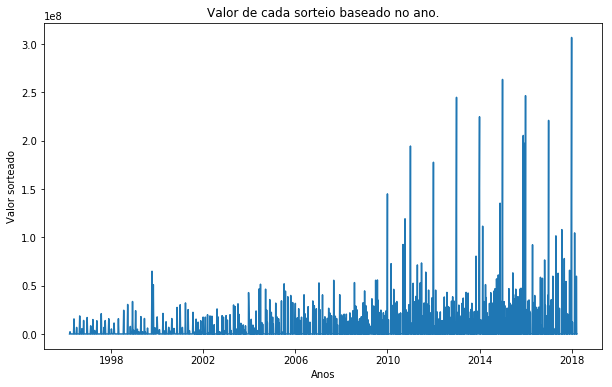

In [141]:
#Importaremos a biblioteca e geraremos o gráfico vázio.
import matplotlib.pyplot as plt


#Utilizaremos os valores como eixo Y e os anos como eixo X.
plt.figure(figsize=(10,6))
plt.plot( dados["Data Sorteio"], dados["Premio"])
plt.xlabel("Anos")
plt.ylabel("Valor sorteado")
plt.title("Valor de cada sorteio baseado no ano.")
plt.show()

É surpreendente a diferença a alta dos valores nos últimos 10 anos. Como, de 2008 para 2018 houveram índices bem maiores que de 1998 à 2008.

In [53]:
#É interessante que se ponha AQUI subplots de 1998-2008 e 2008-2018
#Lembrar de procurar a função que dividirá por anos.
dados
for i in dados["Data Sorteio"].dt.year:
   if i == "2009":
    break
#CONTINUAR....
#DIVIDIR POR DECADAS [1996-2000], [2000, 2010], [2010, 2018]

KeyError: 'Data Sorteio'

## 1.3 Análise baseada em Governos.

A crise política brasileira vem afetando diversos pilares, um dos principais é a economia. Com a economia desrregulada, todos os pilares da sociedade são alterados, inclusive os jogos de sorte. Logo, visto que o sorteiro da MegaSena é realizado pelo governo federal, resolvemos fazer uma análise relacionando um ao outros, as apostas, os valores e o governo atual daquele ano. 

Valendo ressaltar que nos últimos anos, passamos por 3 presidentes. O Lula, a Dilma e o Michel Temer, e ambos se utilizaram de estratégias econômicas diferentes. Logo, faremos uma análise com parte do governo dos três.

Com isso, trabalharemos com as funções *subplots()*. Essa função nos ajudará a criar diversos gráficos, podendo ser um ao lado ou abaixo do outro. Ela é mais uma das funções da biblioteca *matplotlib.pyplot*.

<br>
<div class="alert alert-info">
<b>Gráfico 2</b>
</div>

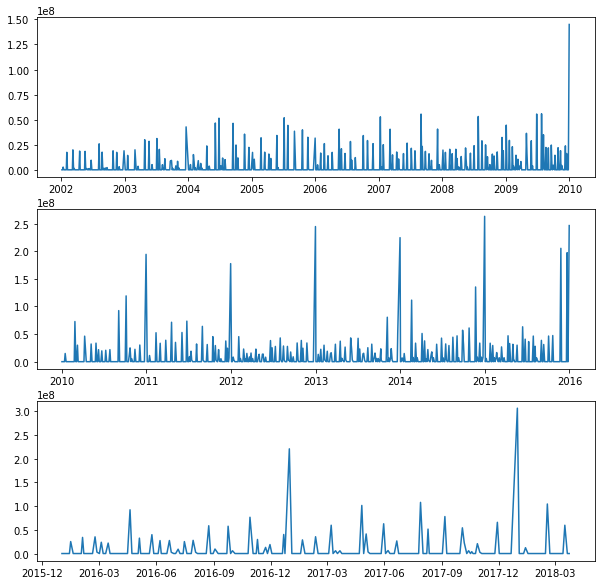

In [159]:
governoLu = dados[dados["Data Sorteio"].dt.year == 2002]

for i in range(2003, 2010):
    a = dados[dados["Data Sorteio"].dt.year == i]
    governoLu =  pd.concat([governoLu, a])

governoDi = dados[dados["Data Sorteio"].dt.year == 2010]
    
for j in range(2011, 2016):
    b = dados[dados["Data Sorteio"].dt.year == j]
    governoDi = pd.concat([governoDi, b])

governoTem = dados[dados["Data Sorteio"].dt.year == 2016]
    
for k in range(2017, 2019):
    c = dados[dados["Data Sorteio"].dt.year == k]
    governoTem = pd.concat([governoTem, c])
    
    
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,1,1)
ax1.plot(governoLu["Data Sorteio"], governoLu["Premio"])

ax2 = fig.add_subplot(3,1,2)
ax2.plot(governoDi["Data Sorteio"], governoDi["Premio"])

ax3 = fig.add_subplot(3,1,3)
ax3.plot(governoTem["Data Sorteio"], governoTem["Premio"])

## 1.4 A DEFINIR

Poderia fazer um estado a cerca da probabilidade de ganhar dinheiro...
Ex.: Comparar as chances de ganhar uma Quadra, Quina ou Mega e construir gráficos acima disso.